<a href="https://colab.research.google.com/github/Gold3neye/Jedha/blob/master/ProjetFull00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Lets start Analysis
import pandas as pd
pd.options.display.max_rows = 1000 # for showing truncated result

import matplotlib.pyplot as plt
#to avoid writing plt.show() again and again
%matplotlib inline 

import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('Speed Dating Data.csv', encoding='ISO-8859-1')

In [11]:
df.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

In [12]:
# Basic EDA and statistical analysis
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Dtype  
---   ------    -----  
 0    iid       int64  
 1    id        float64
 2    gender    int64  
 3    idg       int64  
 4    condtn    int64  
 5    wave      int64  
 6    round     int64  
 7    position  int64  
 8    positin1  float64
 9    order     int64  
 10   partner   int64  
 11   pid       float64
 12   match     int64  
 13   int_corr  float64
 14   samerace  int64  
 15   age_o     float64
 16   race_o    float64
 17   pf_o_att  float64
 18   pf_o_sin  float64
 19   pf_o_int  float64
 20   pf_o_fun  float64
 21   pf_o_amb  float64
 22   pf_o_sha  float64
 23   dec_o     int64  
 24   attr_o    float64
 25   sinc_o    float64
 26   intel_o   float64
 27   fun_o     float64
 28   amb_o     float64
 29   shar_o    float64
 30   like_o    float64
 31   prob_o    float64
 32   met_o     float64
 33   age       float64
 34   field     object 
 35 

In [13]:
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [14]:
#observing the shape of data
df.shape

(8378, 195)

Text(0, 0.5, 'Frequency')

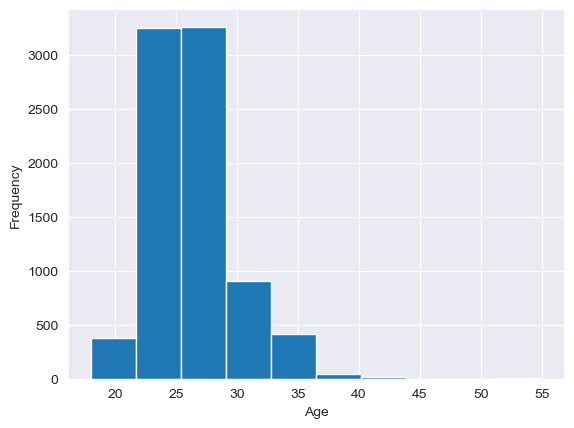

In [15]:
# age distribution of participants
age = df[np.isfinite(df['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [72]:
df.select_dtypes(include=[np.number]).corr(method='spearman').style.format("{:.2}").background_gradient(
    cmap=plt.get_cmap('coolwarm'))

In [40]:
# lets see how many lucky person found the match
pd.crosstab(index=df['match'], columns='counts')

col_0  counts
match        
0        6998
1        1380

In [41]:
# narrowing the dataset
data_1 = df.iloc[:, 11:28]
data_2 = df.iloc[:,30:35]
data_3 = df.iloc[:, 39:43]
data_4 = df.iloc[:, 45:67]
data_5 = df.iloc[:, 69:74]
data_6 = df.iloc[:, 87:91]
data_7 = df.iloc[:, 97:102]
data_8 = df.iloc[:, 104:107]


date = pd.concat([df.iloc[:, 0],df.iloc[:, 2],data_1,data_2,data_3,data_4,data_5,
                  data_6,data_7,data_8], axis=1)
date.head()

iid  gender   pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
0    1       0  11.0      0      0.14         0   27.0     2.0      35.0   
1    1       0  12.0      0      0.54         0   22.0     2.0      60.0   
2    1       0  13.0      1      0.16         1   22.0     4.0      19.0   
3    1       0  14.0      1      0.61         0   23.0     2.0      30.0   
4    1       0  15.0      1      0.21         0   24.0     3.0      30.0   

   pf_o_sin  ...  fun3_1  intel3_1  dec  attr  sinc  intel  fun  like  prob  \
0      20.0  ...     8.0       8.0    1   6.0   9.0    7.0  7.0   7.0   6.0   
1       0.0  ...     8.0       8.0    1   7.0   8.0    7.0  8.0   7.0   5.0   
2      18.0  ...     8.0       8.0    1   5.0   8.0    9.0  8.0   7.0   NaN   
3       5.0  ...     8.0       8.0    1   7.0   6.0    8.0  7.0   7.0   6.0   
4      10.0  ...     8.0       8.0    1   5.0   6.0    7.0  7.0   6.0   6.0   

   met  
0  2.0  
1  1.0  
2  1.0  
3  2.0  
4  2.0  

[5 rows x 67 columns]

In [42]:
# counting null values
date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr        202
sinc        277
intel   

In [43]:
# removing null rows
date2 = date.dropna()

In [44]:
# creating an object- free data frame
date3 = date2.drop(['field', 'from', 'career'], axis=1)

<Axes: title={'center': 'Correlation Heatmap'}>

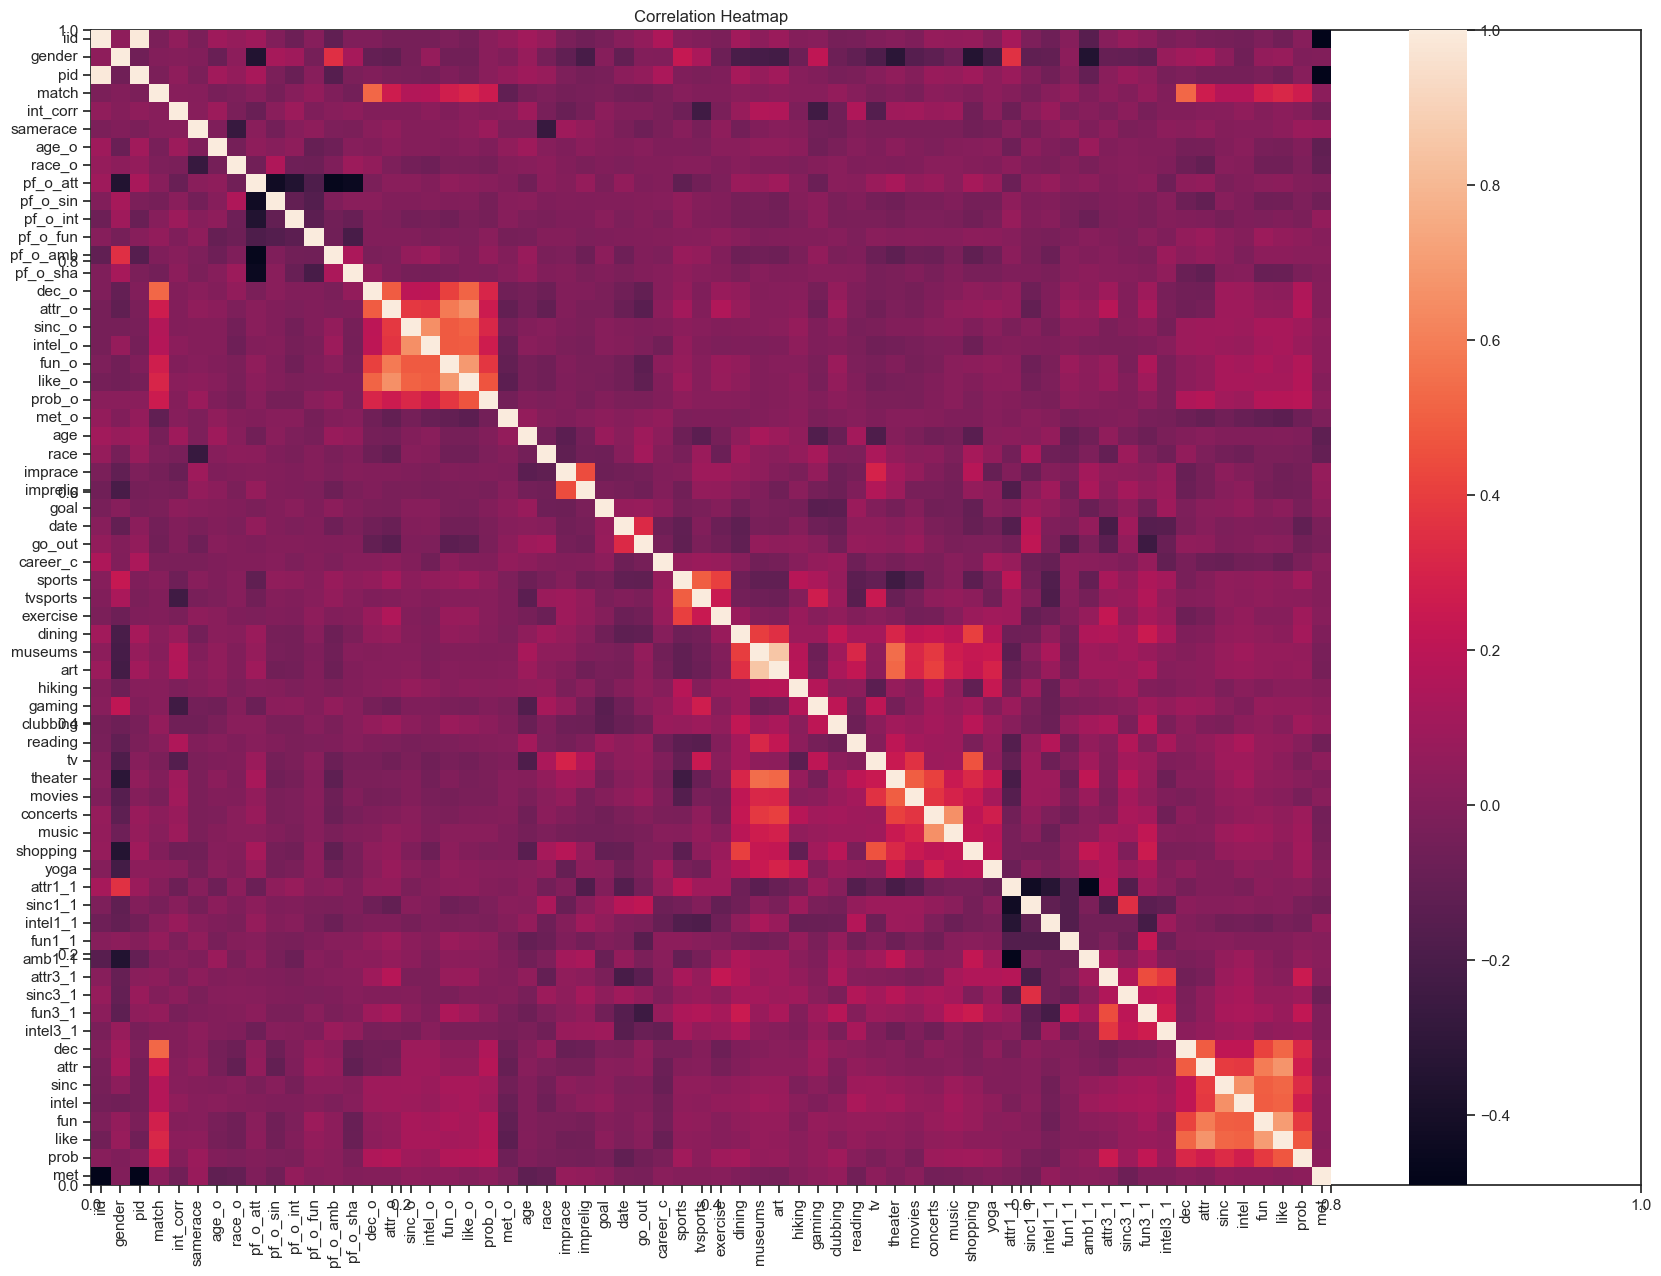

In [45]:
# heat map
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title('Correlation Heatmap')
corr = date3.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

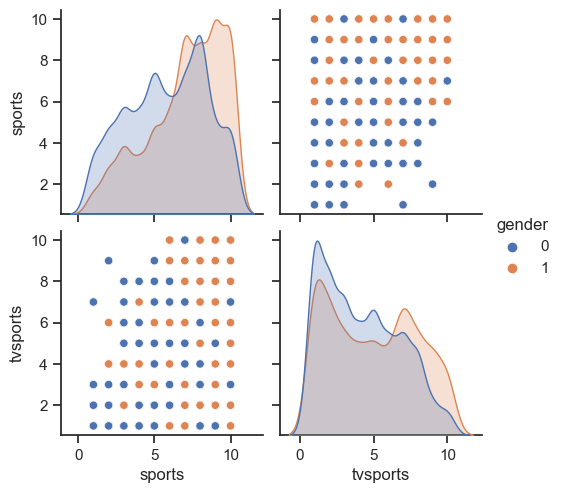

In [46]:
# looking at intrest overlap for sports and tv-sports

sns.set(style='ticks', color_codes=True)
date_int = pd.concat([date3.iloc[:,1], date3.iloc[:, 30:32]], axis = 1)
g = sns.pairplot(date_int, hue='gender')

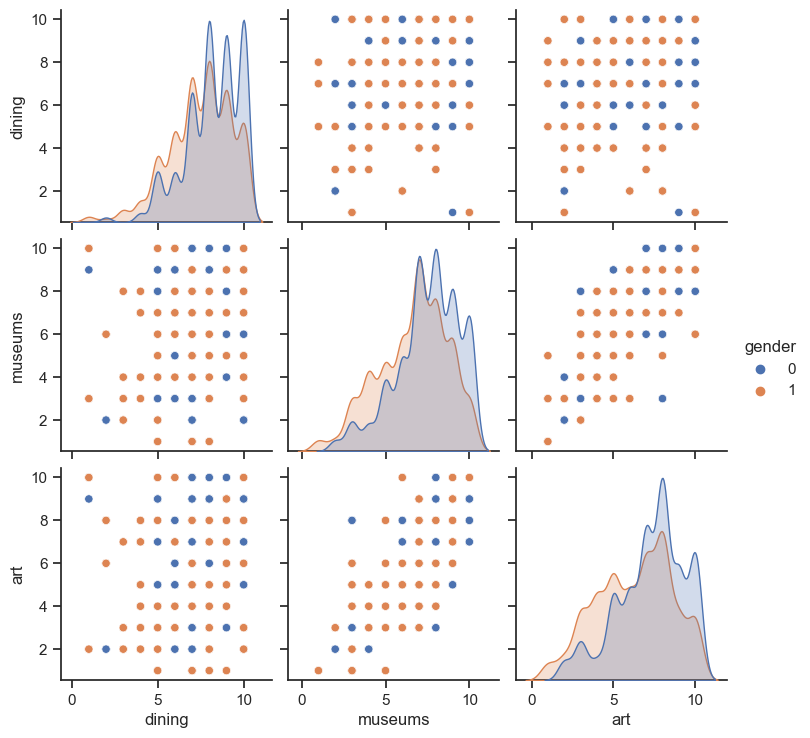

In [47]:
# looking at intrest overlap for dining, museums and arts
sns.set(style='ticks', color_codes=True)
date_int = pd.concat([date3.iloc[:,1], date3.iloc[:, 33:36]], axis = 1)
g = sns.pairplot(date_int, hue='gender')

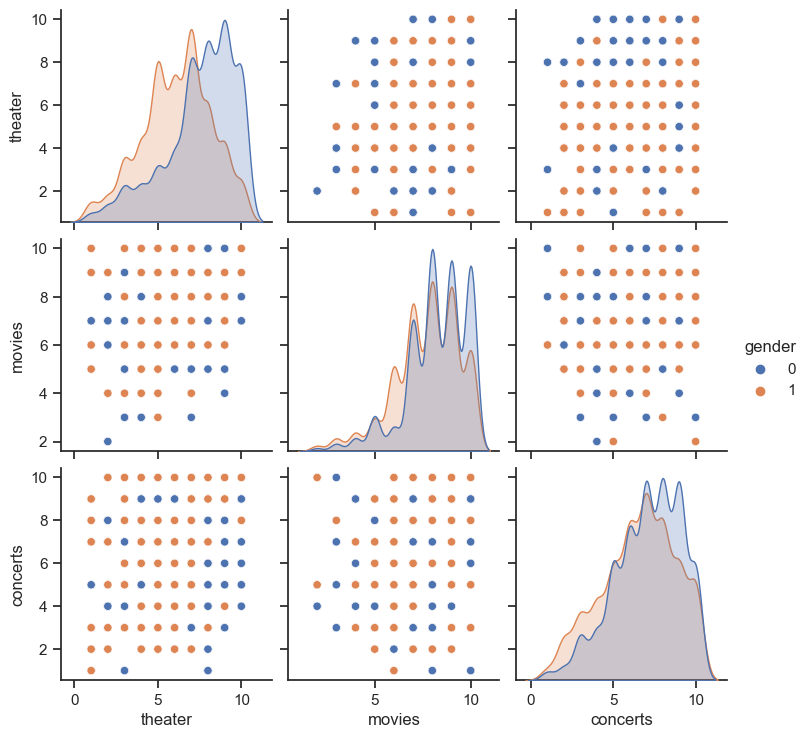

In [48]:
# looking at intrest overlap for theater, movies and concerts
sns.set(style='ticks', color_codes=True)
date_int = pd.concat([date3.iloc[:,1], date3.iloc[:, 41:44]], axis = 1)
g = sns.pairplot(date_int, hue='gender')

In [49]:
# removing intrests
date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

In [50]:
#Going along investigating further gender differences, I wonder... how many of each gender are there and does that affect the other person's decision? That is, do women receive more positive final decisions from the other person (dec_o) than men do?

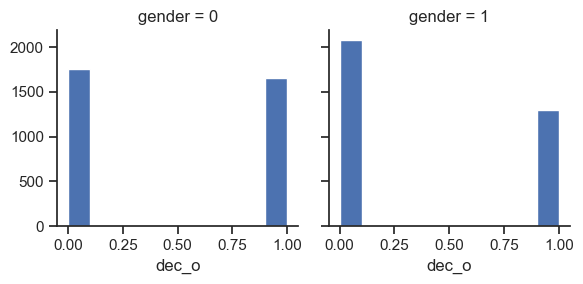

In [51]:
# looking at dec_o by gender
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(date4, col="gender")
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')

In [52]:
# chi-square test
gender_crosstab = pd.crosstab(index=date4.gender, columns=date4.dec_o)
gender_table = sm.stats.Table(gender_crosstab)
gender_result = gender_table.test_nominal_association()
gender_result.pvalue

1.1102230246251565e-16

In [53]:
# unrequited love count
no_love_count = len(date4[(date4['dec_o']==0) & (date4['dec']==1)]) 
+ len(date4[(date4['dec_o']==1) & (date4['dec']==0)])
perc_broken_heart = no_love_count / len(date4.index)
perc_broken_heart*100

26.040900397234072

In [54]:
# encoding unrequited love as a new column
date4['url']=np.where(((date4['dec_o']==0) & (date4['dec']==1))|((date4['dec']==0) & (date4['dec_o']==1)),1,0)

Text(0.5, 0, 'Broken Heart')

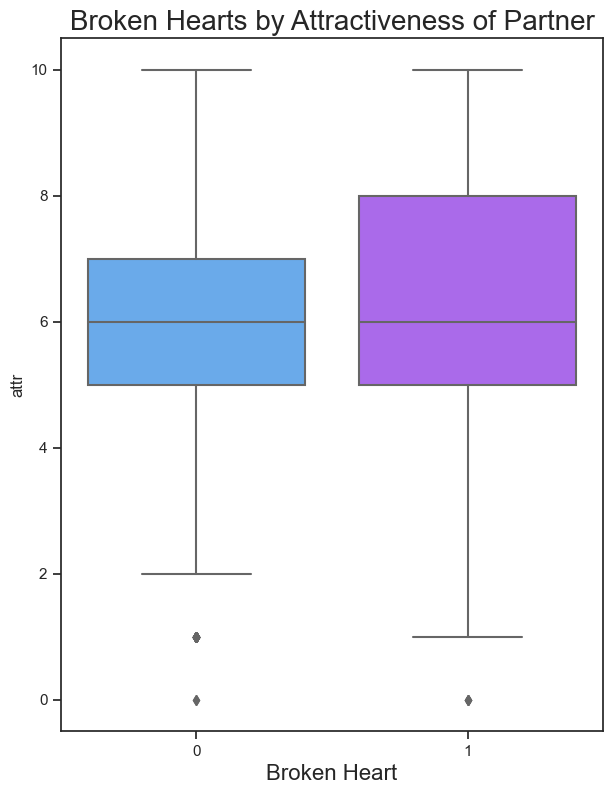

In [55]:
# looking at url by attractiveness
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='attr', data=date4, palette='cool')
plt.title('Broken Hearts by Attractiveness of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)

In [56]:
# chi-square test
bh_crosstab = pd.crosstab(index=date4.attr, columns=date4.url)
bh_table = sm.stats.Table(bh_crosstab)
bh_rslt = bh_table.test_nominal_association()
bh_rslt.pvalue

0.5300021303134914

<Axes: title={'center': 'Correlation Heatmap'}>

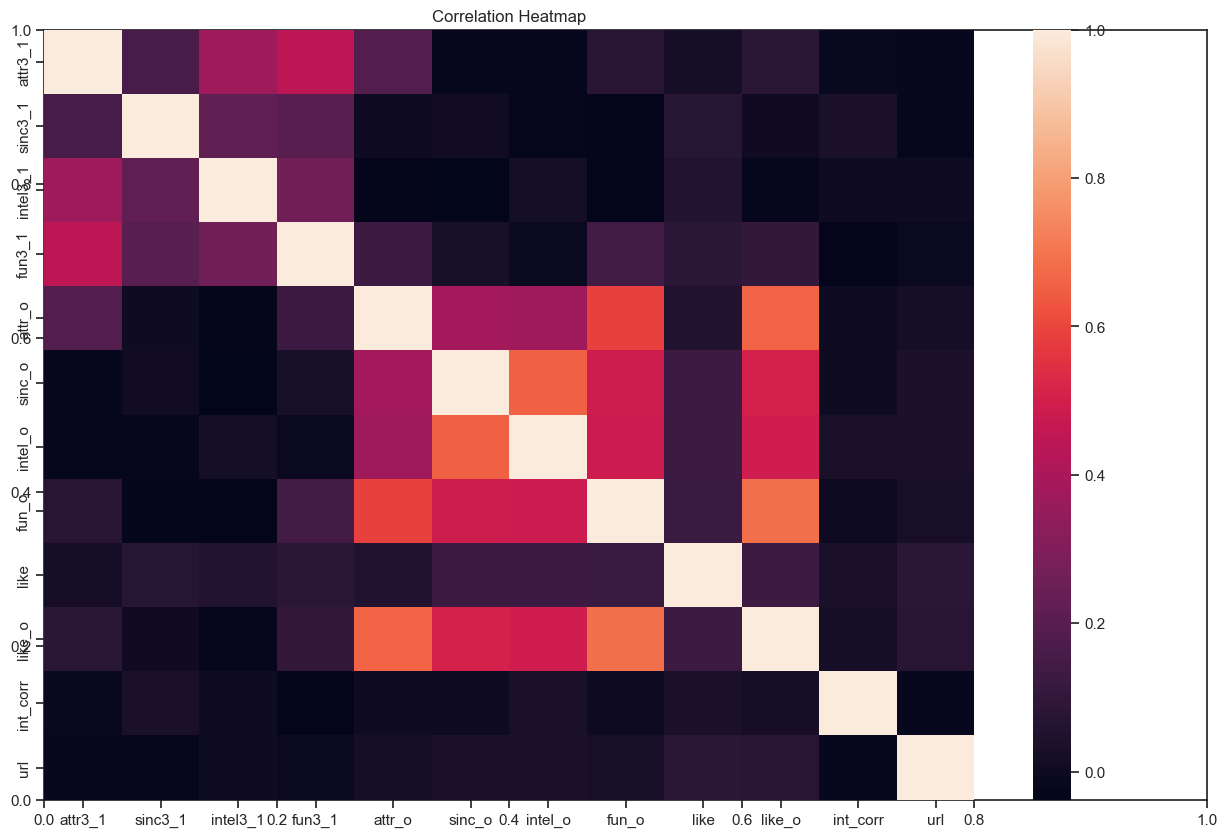

In [57]:
date5 = pd.concat([date4['attr3_1'],date4['sinc3_1'],date4['intel3_1'],date4['fun3_1'],date4['attr_o'],
                   date4['sinc_o'],date4['intel_o'],date4['fun_o'],date4['like'],date4['like_o'], 
                   date4['int_corr'],date4['url']],axis=1)
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date5.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [58]:
#It looks like regardless of your attractiveness, or any other trait for that matter, you are just as likely to experience heartbreak!
#
#It also looks like typically, your own opinion of how attractive you are (attr3_1) is only weakly correlated with how attractive your date finds you (attr_o)! And in fact, there is nearly no correlation between how smart or sincere you think you are versus how smart and sincere your date thinks of you! Perhaps these are tough qualities to get across in a 4 minute date!
#
#So that brings up the question, between attractiveness, sincerity, intelligence, fun, ambition, and liking, what was the most influential in the final decision (dec)? I'll run a linear regression model.

In [59]:
# OLS Model with coefficients
X_ols = date4[['attr','sinc','intel','fun','like','int_corr']]
y_ols = date4.dec
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dec   R-squared (uncentered):                   0.602
Model:                            OLS   Adj. R-squared (uncentered):              0.602
Method:                 Least Squares   F-statistic:                              1712.
Date:                Fri, 28 Jun 2024   Prob (F-statistic):                        0.00
Time:                        15:48:56   Log-Likelihood:                         -3686.4
No. Observations:                6797   AIC:                                      7385.
Df Residuals:                    6791   BIC:                                      7426.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.0555      0.004     15.678      0.000       0.049       0.062
sinc          -0.0351      0.004     -8.750      0.000      -0.043      -0.027
intel         -0.0485      0.004    -11.897      0.000      -0.057      -0.041
fun            0.0173      0.004      4.495      0.000       0.010       0.025
like           0.0997      0.004     22.261      0.000       0.091       0.109
int_corr      -0.0366      0.017     -2.210      0.027      -0.069      -0.004
==============================================================================
Omnibus:                     4603.362   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.555
Skew:                           0.072   Prob(JB):                     2.11e-86
Kurtosis:                       1.828   Cond. No.                         50.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#It turns out that being intelligent or sincere or having similar interests actually slightly hurts your chances at securing that second date! Don't panic though, this is just from 4 minutes of meeting each other! We might take this as advice to focus on breaking the ice and being more fun and likeable in the first date!
#Now let's run an OLS but with both respondents' ratings instead of just one, and this time on match instead of decision (dec).

In [61]:
# OLS model with coefficients
X_ols = date4[['dec','dec_o','attr','attr_o','fun','fun_o','like','like_o','int_corr']]
y_ols = date4.match
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  match   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              1381.
Date:                Fri, 28 Jun 2024   Prob (F-statistic):                        0.00
Time:                        15:48:56   Log-Likelihood:                         -180.33
No. Observations:                6797   AIC:                                      378.7
Df Residuals:                    6788   BIC:                                      440.1
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dec            0.4463      0.007     62.145      0.000       0.432       0.460
dec_o          0.4463      0.007     62.417      0.000       0.432       0.460
attr          -0.0013      0.002     -0.584      0.559      -0.005       0.003
attr_o        -0.0009      0.002     -0.406      0.685      -0.005       0.003
fun            0.0006      0.002      0.249      0.803      -0.004       0.005
fun_o          0.0012      0.002      0.555      0.579      -0.003       0.006
like          -0.0161      0.003     -6.132      0.000      -0.021      -0.011
like_o        -0.0170      0.003     -6.523      0.000      -0.022      -0.012
int_corr       0.0036      0.010      0.364      0.716      -0.016       0.023
==============================================================================
Omnibus:                    33151.792   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              814.640
Skew:                           0.256   Prob(JB):                    1.27e-177
Kurtosis:                       1.383   Cond. No.                         51.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#From the coefficients, it looks like all that really matters is the decision of both participants, and perhaps whether or not they liked one another.

In [63]:
#Modeling - Classification

In [64]:
# preparing the data for train and test
X=date4[['like','dec']]
y=date4['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [65]:
# logistic regression classification model
model = LogisticRegression(C=1, random_state=0)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.8282140886518301
Validation Accuracy: 0.8279411764705882


In [66]:
#Without knowing what the partner's decision is (dec_o), it turns out that given how much the respondent likes the partner and what the respondent's decision is, we have about an 82.5% accuracy in predicting a match on both the training and the validation using logistic regression. This makes sense given that we know only 26% of people were heartbroken -- if you like someone, odds are they will like you back!
#
#Let's try some other models to see if we can get closer to predicting a match.

In [67]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins = True)

NameError: name 'knn' is not defined

In [ ]:
# random forest model
model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

In [ ]:
#Random forest gave us a slightly more accurate model at 82.9% accuracy in train and 82.8% in test.

In [ ]:
# xgboost model
model = GradientBoostingClassifier()
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

In [ ]:
#XGBoost was ever so slightly less accurate than Random Forest in the validation set. Looks like Random Forest is my champion model.

In [ ]:
#Conclusion
#Although this was slightly disappointing, it looks like there still is no real answers to understand female. It's not interests or hobbies, it's not attractiveness or intelligence or other traits.
#
#but we lean a lot in this exploration.